In [ ]:
import umap
import hdbscan
import matplotlib.pyplot as plt
import seaborn as sns

# Extract document vectors from the Top2Vec model
doc_vectors = model.document_vectors

# Perform dimensionality reduction with UMAP
umap_model = umap.UMAP(n_neighbors = 15,
                       min_dist = 0.1,
                       n_components = 3)
umap_vectors = umap_model.fit_transform(doc_vectors)


# Perform clustering with HDBSCAN
hdbscan_model = hdbscan.HDBSCAN(min_cluster_size = 100,
                                min_samples = 20,
                                metric = 'euclidean',
                                cluster_selection_method = 'eom',
                                cluster_selection_epsilon = 0.28)
cluster_labels = hdbscan_model.fit_predict(umap_vectors)

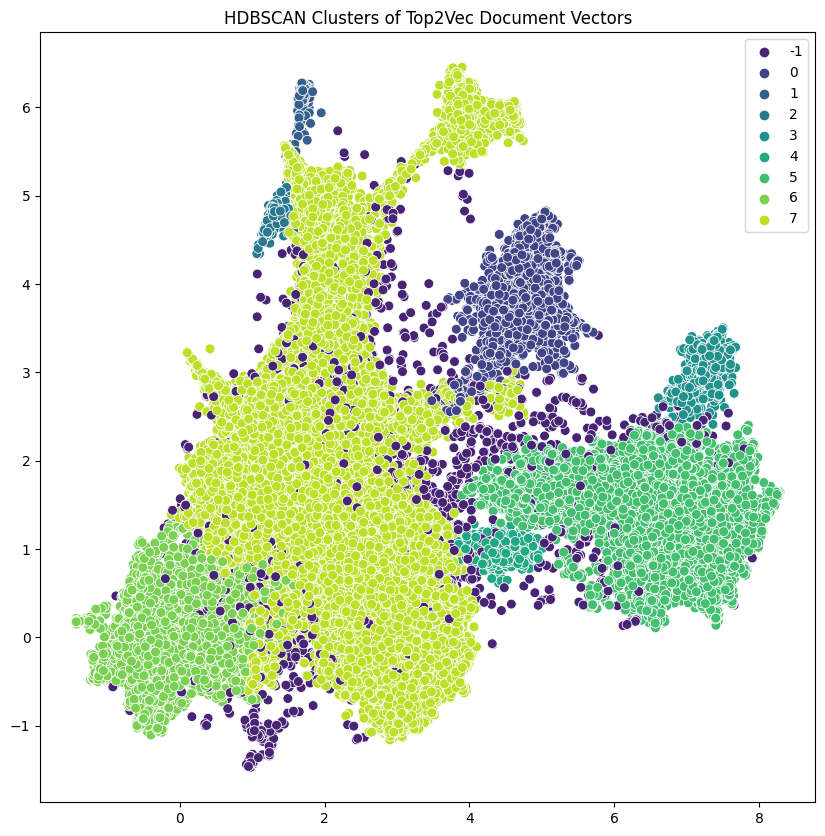

In [ ]:
# Create a scatter plot of the UMAP vectors, colored by cluster
palette = sns.color_palette('viridis', len(set(cluster_labels)))
plt.figure(figsize=(10, 10))
sns.scatterplot(x=umap_vectors[:, 0], y=umap_vectors[:, 1], hue=cluster_labels, palette=palette, s=50)
plt.title('HDBSCAN Clusters of Top2Vec Document Vectors')
plt.show()